In [4]:
!nvidia-smi

Wed Dec  2 06:28:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* @file 深度學習基礎/5_multi_classification_DNN_model.ipynb
  * @brief 5_classification_DNN_model

  * 此份程式碼是以教學為目的，附有完整的架構解說。

  * @author 人工智慧科技基金會 AI 工程師 - 康文瑋
  * Email: run963741@aif.tw
  * Resume: https://www.cakeresume.com/run963741

  * 最後更新日期: 2020/11/26

# 載入函數

In [6]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib

os.chdir('/content/drive/Shared drives/類技術班教材/標準版/ 深度學習基礎/DL_part1')

# 多元分類

在前面的例子中都以二元分類為主，那要延伸到多元分類是非常容易的，差別在於最後神經元的數量。

In [19]:
def generate_spirals(n_samples):
    N = n_samples # number of points per class
    D = 2 # dimensionality
    K = 3 # number of classes
    data = np.zeros((N*K,D)) # data matrix (each row = single example)
    labels = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      labels[ix] = j
    return data, labels

### 產生線性不可分資料集

In [46]:
n_samples = 1000
spiral_X, spiral_y = generate_spirals(n_samples=n_samples)
spiral_y_onehot = pd.get_dummies(spiral_y).values

In [47]:
print('spiral_X: ', spiral_X[:5])
print('spiral_y: ', spiral_y[:5])

spiral_X:  [[ 0.00000000e+00  0.00000000e+00]
 [-1.38174687e-04  9.91418559e-04]
 [ 7.34003524e-05  2.00065599e-03]
 [ 2.42593635e-04  2.99318816e-03]
 [ 4.45419640e-05  4.00375625e-03]]
spiral_y:  [0 0 0 0 0]


### 資料視覺化

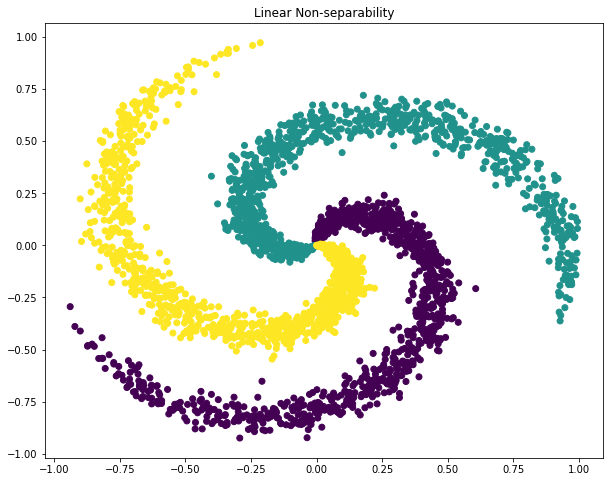

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(spiral_X[:,0], spiral_X[:,1], c = spiral_y)
plt.title('Linear Non-separability')
plt.show()

## 切割訓練集 (Training set) 以及測試集 (testing set)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(spiral_X, spiral_y_onehot, test_size=0.2, shuffle=True)

print('Training data size: ', X_train.shape)
print('Testing data size: ', X_test.shape)

Training data size:  (2400, 2)
Testing data size:  (600, 2)


## 建立模型



In [50]:
input = tf.keras.layers.Input(shape=(2,), name='Input_layer')
dense1 = tf.keras.layers.Dense(8, activation='relu', use_bias=True, name='dense1')
dense2 = tf.keras.layers.Dense(4, activation='relu', use_bias=True, name='dense2')
dense3 = tf.keras.layers.Dense(3, activation='sigmoid', use_bias=True, name='dense3')

dense1_output = dense1(input)
dense2_output = dense2(dense1_output)
output = dense3(dense2_output)

model = tf.keras.Model(input, output, name='linear_nonseparability')

model.summary()

Model: "linear_nonseparability"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 2)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 8)                 24        
_________________________________________________________________
dense2 (Dense)               (None, 4)                 36        
_________________________________________________________________
dense3 (Dense)               (None, 3)                 15        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

* `optimizer`: 請使用 `sgd`, 其中 `momentum` 請設定 `0.9`
* `loss`: 請使用 `binary_crossentropy`
* `metrics`: 請使用 `accuracy`
* `epochs`: 請設定為 `200`
* `batch_size`: 請設定為 `32`

In [51]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [52]:
# 訓練模型
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)

Epoch 1/200
75/75 [==============================] - 0s 4ms/step - loss: 1.0830 - accuracy: 0.3713 - val_loss: 1.0652 - val_accuracy: 0.4667
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 1.0546 - accuracy: 0.4654 - val_loss: 1.0335 - val_accuracy: 0.4433
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 1.0217 - accuracy: 0.4817 - val_loss: 0.9953 - val_accuracy: 0.4567
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.9829 - accuracy: 0.4933 - val_loss: 0.9503 - val_accuracy: 0.4650
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.4975 - val_loss: 0.8794 - val_accuracy: 0.5217
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.5521 - val_loss: 0.7827 - val_accuracy: 0.5700
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.7699 - accuracy: 0.5725 - val_loss: 0.7334 - val_accuracy: 0.5983
Epoch 8/200
7

## 評估模型

In [61]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=-1)
y_true_class = np.argmax(y_test, axis=-1)

# 模型預測，每個數值表示每筆資料的預測概率，通常用 0.5 當成閥值，小於 0.5 屬於第一類；大於 0.5 屬於第二類
print('Model predicted probabilities: ', y_pred[:5])
print('Model predicted classes: ', y_pred_class[:5])
print('Ground Truth: ', y_true_class[:5])

Model predicted probabilities:  [[1.15972085e-04 2.58548728e-28 1.05642384e-08]
 [1.99070796e-02 2.50607699e-01 6.36215438e-04]
 [9.62244153e-01 4.08996481e-20 9.92120385e-06]
 [1.33797461e-22 6.21447069e-24 2.02547137e-16]
 [6.69084115e-19 3.15900967e-27 1.25927245e-14]]
Model predicted classes:  [0 1 0 2 2]
Ground Truth:  [0 1 0 2 2]


### 混淆矩陣

In [63]:
cnfm = confusion_matrix(y_pred=y_pred_class, y_true=y_true_class)
cnfm = pd.DataFrame(cnfm, columns=['Pred_0', 'Pred_1', 'Pred_2'], index=['Actual_0', 'Actual_1', 'Actual_2'])
cnfm

,Pred_0,Pred_1,Pred_2
Actual_0,190,0,3
Actual_1,0,219,2
Actual_2,1,0,185


### Precision, Recall

In [64]:
report =  classification_report(y_pred=y_pred_class, y_true=y_true_class)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       193
           1       1.00      0.99      1.00       221
           2       0.97      0.99      0.98       186

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



## Prediction boundary

接下來我們來觀察模型的預測邊界，透過這個方式，可以了解模型在判斷資料時的依據，到底在哪個地方判斷每個類別。

In [73]:
# 產生網格資料
x1=np.linspace(-1,1,100)
x2=np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1, x2)
plot_data = np.array(list(zip(x1.flatten(), x2.flatten())))

print('Plot data shape: ', plot_data.shape)

Plot data shape:  (10000, 2)


In [74]:
# 將網格上每個點都進行預測
plot_y = model.predict(plot_data)
plot_y_class = np.argmax(plot_y, axis=-1)

### Plot boundary

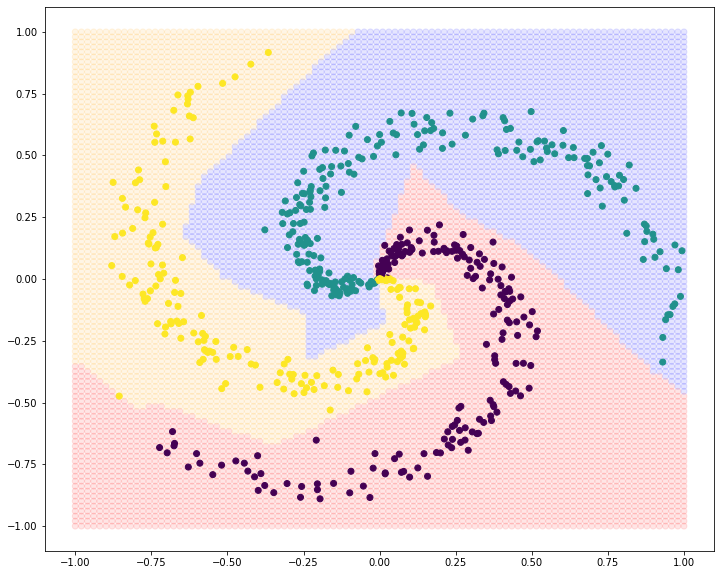

In [75]:
plt.figure(figsize=(12,10))
colors = ['red', 'blue', 'orange']
# 第一個 scatter 畫出網格點, 顏色分別為紅色和藍色
plt.scatter(x1, x2, c = plot_y_class, alpha=0.1, cmap=matplotlib.colors.ListedColormap(colors))

# 第二個 scatter 畫出測試集 X_test 的預測類別
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred_class)
plt.show()